In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
# pandas print without 'e'
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# style of plots is 'ggplot'
plt.style.use('ggplot')

# Loading (pandas)

In [2]:
# https://ru.stackoverflow.com/questions/769110/pandas-%D0%BF%D1%80%D0%B8-%D1%87%D1%82%D0%B5%D0%BD%D0%B8%D0%B8-csv-%D1%84%D0%B0%D0%B9%D0%BB%D0%B0-%D0%BD%D0%B5-%D0%BF%D0%B0%D1%80%D1%81%D0%B8%D1%82-%D1%87%D0%B8%D1%81%D0%BB%D0%B0-%D1%81%D0%BE%D0%B4%D0%B5%D1%80%D0%B6%D0%B0%D1%89%D0%B8%D0%B5-%D0%B7%D0%B0%D0%BF%D1%8F%D1%82%D1%83%D1%8E-%D0%B2-%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B5-%D0%B4%D0%B5%D1%81%D1%8F%D1%82
# 'decimal' is about ',' and '.' in numbers
df = pd.read_csv('orders_st.csv', sep=';', decimal=',')

print((df.info()))
print((df.describe()))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851174 entries, 0 to 2851173
Data columns (total 4 columns):
id_o      int64
id_u      int64
o_date    object
price     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 87.0+ MB
None
            id_o       id_u               price
count 2851174.00 2851174.00          2851174.00
mean  3109378.45 1899114.02       1888562486.56
std   2263497.69 1771364.72    3188914143473.47
min       129.00       0.00            -1605.10
25%   1034214.75  425886.50              576.80
50%   2787853.00 1310122.00             1084.30
75%   5061009.75 3069821.00             1934.80
max   7488720.00 6455922.00 5384615384615380.00


,id_o,id_u,o_date,price
0,129,1,26.04.2013 15:33:35,1029.00
1,130,155,26.04.2013 16:14:06,140.00
2,131,1,26.04.2013 16:43:30,463.40
3,132,1,26.04.2013 17:20:17,663.60
4,133,1,29.04.2013 12:00:02,1739.50


# Lossless compression

In [3]:
# https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
# change numeric types to more compact types
df['id_o'] = pd.to_numeric(df['id_o'], downcast='unsigned')
df['id_u'] = pd.to_numeric(df['id_u'], downcast='unsigned')

print((df.info()))
print((df.describe()))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851174 entries, 0 to 2851173
Data columns (total 4 columns):
id_o      uint32
id_u      uint32
o_date    object
price     float64
dtypes: float64(1), object(1), uint32(2)
memory usage: 65.3+ MB
None
            id_o       id_u               price
count 2851174.00 2851174.00          2851174.00
mean  3109378.45 1899114.02       1888562486.56
std   2263497.69 1771364.72    3188914143473.47
min       129.00       0.00            -1605.10
25%   1034214.75  425886.50              576.80
50%   2787853.00 1310122.00             1084.30
75%   5061009.75 3069821.00             1934.80
max   7488720.00 6455922.00 5384615384615380.00


,id_o,id_u,o_date,price
0,129,1,26.04.2013 15:33:35,1029.00
1,130,155,26.04.2013 16:14:06,140.00
2,131,1,26.04.2013 16:43:30,463.40
3,132,1,26.04.2013 17:20:17,663.60
4,133,1,29.04.2013 12:00:02,1739.50


# Delete 2013 year

In [4]:
# https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.contains.html
# search indexes of rows in column 'o_date' wirh regexp '2013'
rows_with_2013 = df[df['o_date'].str.contains('2013')].index

# check first year is 2013
df.head(len(rows_with_2013) + 2)

,id_o,id_u,o_date,price
0,129,1,26.04.2013 15:33:35,1029.00
1,130,155,26.04.2013 16:14:06,140.00
2,131,1,26.04.2013 16:43:30,463.40
3,132,1,26.04.2013 17:20:17,663.60
4,133,1,29.04.2013 12:00:02,1739.50
5,134,44,16.05.2013 14:08:45,743.40
6,135,1,16.05.2013 16:23:53,5439.00
7,137,160,16.05.2013 23:07:46,969.50
8,138,1,17.05.2013 9:42:44,12035.10
9,141,176,22.05.2013 16:28:47,576.80


In [5]:
# http://qaru.site/questions/15871022/delete-pandas-df-row-using-mask-based-on-the-last-letter-of-a-string-column
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
# drop rows with '2013' and reset index
df.drop(rows_with_2013, inplace=True)
df.reset_index(inplace=True, drop=True)

print((df.info()))
print((df.describe()))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818807 entries, 0 to 2818806
Data columns (total 4 columns):
id_o      uint32
id_u      uint32
o_date    object
price     float64
dtypes: float64(1), object(1), uint32(2)
memory usage: 64.5+ MB
None
            id_o       id_u      price
count 2818807.00 2818807.00 2818807.00
mean  3144883.47 1920443.91    1709.89
std   2251933.61 1770220.57    2506.41
min     33962.00       0.00   -1605.10
25%   1088052.50  440634.00     576.10
50%   2829083.00 1334140.00    1082.90
75%   5091384.50 3097147.00    1934.80
max   7488720.00 6455922.00  630074.90


,id_o,id_u,o_date,price
0,33962,66388,01.01.2014 6:26:10,2893.10
1,33963,66400,01.01.2014 12:38:26,560.00
2,33964,66403,01.01.2014 13:02:34,4415.60
3,33965,66407,01.01.2014 13:47:19,1841.70
4,33966,66408,01.01.2014 14:07:46,845.60


# Filtration (negative prices)

In [6]:
# check negative numbers or 0 in 'price'
negative_price = df[df['price'] <= 0]
negative_price

,id_o,id_u,o_date,price
308699,386407,155823,14.04.2015 14:40:48,0.00
315358,393066,390698,20.04.2015 14:06:09,0.00
583765,820384,189642,22.10.2015 20:26:36,-1.40
687207,1049151,447755,01.12.2015 8:35:40,0.00
735608,1155915,471946,17.12.2015 23:56:55,-1605.10
735609,1155918,471946,17.12.2015 23:56:56,-90.30
847707,1401600,272316,20.02.2016 12:27:58,-2.10
948985,1615909,926637,13.04.2016 15:52:49,0.00
954212,1627392,428359,15.04.2016 10:13:30,-10.50
1024881,1784326,215957,23.05.2016 19:41:56,0.00


In [7]:
# drop rows with negative price and reset index
df.drop(negative_price.index, inplace=True)
df.reset_index(inplace=True, drop=True)

print((df.info()))
print((df.describe()))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818755 entries, 0 to 2818754
Data columns (total 4 columns):
id_o      uint32
id_u      uint32
o_date    object
price     float64
dtypes: float64(1), object(1), uint32(2)
memory usage: 64.5+ MB
None
            id_o       id_u      price
count 2818755.00 2818755.00 2818755.00
mean  3144900.19 1920462.33    1709.92
std   2251942.24 1770225.85    2506.42
min     33962.00       0.00       0.70
25%   1088029.50  440634.00     576.10
50%   2829134.00 1334163.00    1082.90
75%   5091412.50 3097187.00    1934.80
max   7488720.00 6455922.00  630074.90


,id_o,id_u,o_date,price
0,33962,66388,01.01.2014 6:26:10,2893.10
1,33963,66400,01.01.2014 12:38:26,560.00
2,33964,66403,01.01.2014 13:02:34,4415.60
3,33965,66407,01.01.2014 13:47:19,1841.70
4,33966,66408,01.01.2014 14:07:46,845.60


# Lossless compression

In [8]:
# https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
# change 'price' to more compact dtype
df['price'] = pd.to_numeric(df['price'], downcast='float')

print((df.info()))
print((df.describe()))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818755 entries, 0 to 2818754
Data columns (total 4 columns):
id_o      uint32
id_u      uint32
o_date    object
price     float32
dtypes: float32(1), object(1), uint32(2)
memory usage: 53.8+ MB
None
            id_o       id_u      price
count 2818755.00 2818755.00 2818755.00
mean  3144900.19 1920462.33    1709.75
std   2251942.24 1770225.85    2501.63
min     33962.00       0.00       0.70
25%   1088029.50  440634.00     576.10
50%   2829134.00 1334163.00    1082.90
75%   5091412.50 3097187.00    1934.80
max   7488720.00 6455922.00  630074.88


,id_o,id_u,o_date,price
0,33962,66388,01.01.2014 6:26:10,2893.10
1,33963,66400,01.01.2014 12:38:26,560.00
2,33964,66403,01.01.2014 13:02:34,4415.60
3,33965,66407,01.01.2014 13:47:19,1841.70
4,33966,66408,01.01.2014 14:07:46,845.60


# Filtration (outliers)

In [9]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html
# calculate quantile of 'price'
alpha1 = 0.3173
alpha2 = 0.0455
alpha3 = 0.0027

quantile_of_price = df['price'].quantile(1 - alpha3)
print(quantile_of_price)

indexes_with_big_price = df[df['price'] > quantile_of_price]
indexes_with_big_price['price'].count()

18195.099609375


7601

In [10]:
# drop rows with outliers in 'price' and reset index
# df.drop(indexes_with_big_price.index, inplace=True)
# df.reset_index(inplace=True, drop=True)

print((df.info()))
print((df.describe()))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818755 entries, 0 to 2818754
Data columns (total 4 columns):
id_o      uint32
id_u      uint32
o_date    object
price     float32
dtypes: float32(1), object(1), uint32(2)
memory usage: 53.8+ MB
None
            id_o       id_u      price
count 2818755.00 2818755.00 2818755.00
mean  3144900.19 1920462.33    1709.75
std   2251942.24 1770225.85    2501.63
min     33962.00       0.00       0.70
25%   1088029.50  440634.00     576.10
50%   2829134.00 1334163.00    1082.90
75%   5091412.50 3097187.00    1934.80
max   7488720.00 6455922.00  630074.88


,id_o,id_u,o_date,price
0,33962,66388,01.01.2014 6:26:10,2893.10
1,33963,66400,01.01.2014 12:38:26,560.00
2,33964,66403,01.01.2014 13:02:34,4415.60
3,33965,66407,01.01.2014 13:47:19,1841.70
4,33966,66408,01.01.2014 14:07:46,845.60


# Extracting data (year, month, type of order)

In [11]:
# https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# change df['o_date'] to datetime64 type
df['o_date'] = pd.to_datetime(df['o_date'], format='%d.%m.%Y %H:%M:%S')

print((df.info()))
print((df.describe()))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818755 entries, 0 to 2818754
Data columns (total 4 columns):
id_o      uint32
id_u      uint32
o_date    datetime64[ns]
price     float32
dtypes: datetime64[ns](1), float32(1), uint32(2)
memory usage: 53.8 MB
None
            id_o       id_u      price
count 2818755.00 2818755.00 2818755.00
mean  3144900.19 1920462.33    1709.75
std   2251942.24 1770225.85    2501.63
min     33962.00       0.00       0.70
25%   1088029.50  440634.00     576.10
50%   2829134.00 1334163.00    1082.90
75%   5091412.50 3097187.00    1934.80
max   7488720.00 6455922.00  630074.88


,id_o,id_u,o_date,price
0,33962,66388,2014-01-01 06:26:10,2893.10
1,33963,66400,2014-01-01 12:38:26,560.00
2,33964,66403,2014-01-01 13:02:34,4415.60
3,33965,66407,2014-01-01 13:47:19,1841.70
4,33966,66408,2014-01-01 14:07:46,845.60


In [12]:
# https://stackoverflow.com/questions/13648774/get-year-month-or-day-from-numpy-datetime64
# extracting year and month from 'o_date'
df['year'] = df['o_date'].apply(lambda x: x.year)
df['month'] = df['o_date'].apply(lambda x: x.month)

df['year'] = pd.to_numeric(df['year'], downcast='unsigned')
df['month'] = pd.to_numeric(df['month'], downcast='unsigned')

print((df.info()))
print((df.describe()))
df.head()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818755 entries, 0 to 2818754
Data columns (total 6 columns):
id_o      uint32
id_u      uint32
o_date    datetime64[ns]
price     float32
year      uint16
month     uint8
dtypes: datetime64[ns](1), float32(1), uint16(1), uint32(2), uint8(1)
memory usage: 61.8 MB
None
            id_o       id_u      price       year      month
count 2818755.00 2818755.00 2818755.00 2818755.00 2818755.00
mean  3144900.19 1920462.33    1709.75    2016.13       7.14
std   2251942.24 1770225.85    2501.63       1.04       3.73
min     33962.00       0.00       0.70    2014.00       1.00
25%   1088029.50  440634.00     576.10    2015.00       4.00
50%   2829134.00 1334163.00    1082.90    2016.00       8.00
75%   5091412.50 3097187.00    1934.80    2017.00      11.00
max   7488720.00 6455922.00  630074.88    2018.00      12

,id_o,id_u,o_date,price,year,month
0,33962,66388,2014-01-01 06:26:10,2893.10,2014,1
1,33963,66400,2014-01-01 12:38:26,560.00,2014,1
2,33964,66403,2014-01-01 13:02:34,4415.60,2014,1
3,33965,66407,2014-01-01 13:47:19,1841.70,2014,1
4,33966,66408,2014-01-01 14:07:46,845.60,2014,1


In [13]:
# dict for 'order_checking'
# dict remembers id_u that have already been mentioned
memory_dict = {}

# check that the order is secondary


def order_checking(id_u):
    if id_u in memory_dict:
        return True
    else:
        memory_dict[id_u] = True
        return False


# extracting type of order (primary or secondary)
# primary == False
# secondary == True
df['type_of_order'] = df['id_u'].apply(order_checking)

print((df.info()))
print((df.describe()))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818755 entries, 0 to 2818754
Data columns (total 7 columns):
id_o             uint32
id_u             uint32
o_date           datetime64[ns]
price            float32
year             uint16
month            uint8
type_of_order    bool
dtypes: bool(1), datetime64[ns](1), float32(1), uint16(1), uint32(2), uint8(1)
memory usage: 64.5 MB
None
            id_o       id_u      price       year      month
count 2818755.00 2818755.00 2818755.00 2818755.00 2818755.00
mean  3144900.19 1920462.33    1709.75    2016.13       7.14
std   2251942.24 1770225.85    2501.63       1.04       3.73
min     33962.00       0.00       0.70    2014.00       1.00
25%   1088029.50  440634.00     576.10    2015.00       4.00
50%   2829134.00 1334163.00    1082.90    2016.00       8.00
75%   5091412.50 3097187.00    1934.80    2017.00      11.00
max   7488720.00 6455922.00  630074.88    2018.00      12.00


,id_o,id_u,o_date,price,year,month,type_of_order
0,33962,66388,2014-01-01 06:26:10,2893.10,2014,1,False
1,33963,66400,2014-01-01 12:38:26,560.00,2014,1,False
2,33964,66403,2014-01-01 13:02:34,4415.60,2014,1,False
3,33965,66407,2014-01-01 13:47:19,1841.70,2014,1,False
4,33966,66408,2014-01-01 14:07:46,845.60,2014,1,False


# Create pivot table (pandas)

In [14]:
# http://datareview.info/article/svodnyie-tablitsyi-v-python/
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
# create pivot table
pivot_table = pd.pivot_table(
    df,
    values='price',
    index=['year', 'month'],
    columns='type_of_order',
    aggfunc=[sum, len, 'mean'])

pivot_table

sum                   len             mean        
type_of_order        False        True     False    True    False   True 
year month                                                               
2014 1          6423418.50   2032559.88  4252.00  1417.00 1510.68 1434.41
     2          8451002.00   3960493.50  5059.00  2462.00 1670.49 1608.65
     3         14074470.00   5820574.00  7843.00  3348.00 1794.53 1738.52
     4         16400423.00   6907740.50  9221.00  4131.00 1778.59 1672.17
     5         20539852.00   6420844.50 11037.00  4054.00 1861.00 1583.83
     6         20957374.00   6727202.50 10222.00  4127.00 2050.22 1630.05
     7         21804286.00   8517702.00 11341.00  4980.00 1922.61 1710.38
     8         22223320.00   9624635.00 11464.00  5530.00 1938.53 1740.44
     9         22448120.00  10557109.00 11895.00  6731.00 1887.19 1568.43
     10        24694082.00  12879703.00 13326.00  8331.00 1853.08 1546.00
     11        34954440.00  17306228.00 20268.00 11620.00 1724.61 1489.35
     12        61015552.00  22865338.00 32804.00 14799.00 1860.00 1545.06
2015 1         24514220.00  16835278.00 12966.00 11400.00 1890.65 1476.78
     2         21557034.00  13505176.00 10885.00  9161.00 1980.43 1474.20
     3         32331540.00  19133576.00 16108.00 12093.00 2007.17 1582.20
     4         35679052.00  25908756.00 18890.00 16933.00 1888.78 1530.07
     5         35957504.00  26613584.00 19417.00 17992.00 1851.86 1479.19
     6         32579852.00  27272084.00 17231.00 18820.00 1890.77 1449.10
     7         34647104.00  31175280.00 21313.00 25406.00 1625.63 1227.08
     8         31613558.00  29812126.00 18334.00 22280.00 1724.31 1338.07
     9         32533032.00  35137752.00 20479.00 28248.00 1588.60 1243.90
     10        47044912.00  48897904.00 27908.00 35255.00 1685.71 1386.98
     11        63512740.00  63003668.00 38201.00 47453.00 1662.59 1327.71
     12        68728160.00  55910324.00 43158.00 41192.00 1592.48 1357.31
2016 1         37363248.00  37100144.00 20533.00 26003.00 1819.67 1426.76
     2         35078232.00  38348920.00 19490.00 25585.00 1799.81 1498.88
     3         42500080.00  46138320.00 25496.00 34020.00 1666.93 1356.21
     4         48771428.00  58423036.00 26871.00 40861.00 1815.02 1429.80
     5         37647688.00  45898736.00 20844.00 33838.00 1806.16 1356.43
     6         40793704.00  48972796.00 23158.00 36787.00 1761.54 1331.25
     7         41407548.00  45674416.00 22859.00 34365.00 1811.43 1329.10
     8         46673332.00  60697256.00 26213.00 40961.00 1780.54 1481.83
     9         55187888.00  62459340.00 29232.00 40911.00 1887.93 1526.71
     10        78635816.00  84179952.00 40390.00 49366.00 1946.91 1705.22
     11       101677168.00  95775288.00 57243.00 58037.00 1776.24 1650.25
     12       106247248.00  92991832.00 68636.00 59531.00 1547.98 1562.07
2017 1         66105144.00  70219112.00 34053.00 42089.00 1941.24 1668.35
     2         61464244.00  62878320.00 32398.00 38251.00 1897.16 1643.83
     3         77804168.00  87442392.00 40200.00 50139.00 1935.43 1744.00
     4         69457496.00  79844960.00 36117.00 47521.00 1923.12 1680.20
     5         71123928.00  74342688.00 35773.00 44147.00 1988.20 1683.98
     6         57656320.00  60055816.00 30100.00 34286.00 1915.49 1751.61
     7         56580652.00  53455012.00 28746.00 29878.00 1968.30 1789.11
     8         68182504.00  63281120.00 35272.00 34816.00 1933.05 1817.59
     9         78248736.00  74804632.00 37846.00 38175.00 2067.56 1959.52
     10        94404680.00  91157752.00 46094.00 46633.00 2048.09 1954.79
     11       115573696.00 102259000.00 60015.00 54326.00 1925.75 1882.32
     12       145474992.00 105412472.00 85062.00 62575.00 1710.22 1684.58
2018 1        102072000.00  95449120.00 53776.00 51644.00 1898.10 1848.21
     2         56037568.00  48915456.00 28962.00 27246.00 1934.87 1795.33

# View pilot table (matplotlib)

In [15]:
# https://www.digitalocean.com/community/tutorials/data-analysis-and-visualization-with-pandas-and-jupyter-notebook-in-python-3
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot
# https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl
# https://matplotlib.org/gallery/subplots_axes_and_figures/figure_title.html


def custom_plot(axes,
                chart_type,
                items,
                comparison_dict=None,
                ylabel='Item',
                xlabel='Month',
                title='Custom plot',
                xdata=None):

    title_style = {
        'family': 'sans-serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 20
    }

    axes_lables_style = {
        'family': 'sans-serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16
    }

    subplot_number = {'sum': 0, 'len': 1, 'mean': 2}

    sum_table = None
    if not (chart_type == 'comparison'):
        sum_table = pivot_table[(chart_type, False)] \
            + pivot_table[(chart_type, True)]

    if chart_type == 'mean':
        sum_table /= 2

    if chart_type == 'comparison':
        axes.set_title(title, fontdict=title_style)
        axes.set_xlabel(xlabel, fontdict=axes_lables_style)
        axes.set_ylabel(ylabel, fontdict=axes_lables_style)
    else:
        axes[subplot_number[chart_type]].set_title(title, fontdict=title_style)
        axes[subplot_number[chart_type]].set_xlabel(
            xlabel, fontdict=axes_lables_style)
        axes[subplot_number[chart_type]].set_ylabel(
            ylabel, fontdict=axes_lables_style)

    if chart_type == 'comparison':
        for item in items:
            axes.plot(xdata, comparison_dict[item], 'o-', label=item)

        axes.legend(
            loc='best',
            title='Comparison item',
            #title_fontsize = 'x-large',
            fontsize='large')
    else:
        for item in items:
            axes[subplot_number[chart_type]].plot(
                sum_table[item], 'o-', label=item)

        axes[subplot_number[chart_type]].legend(
            loc='best',
            title='Year',
            #title_fontsize = 'x-large',
            fontsize='large',
            ncol=2)

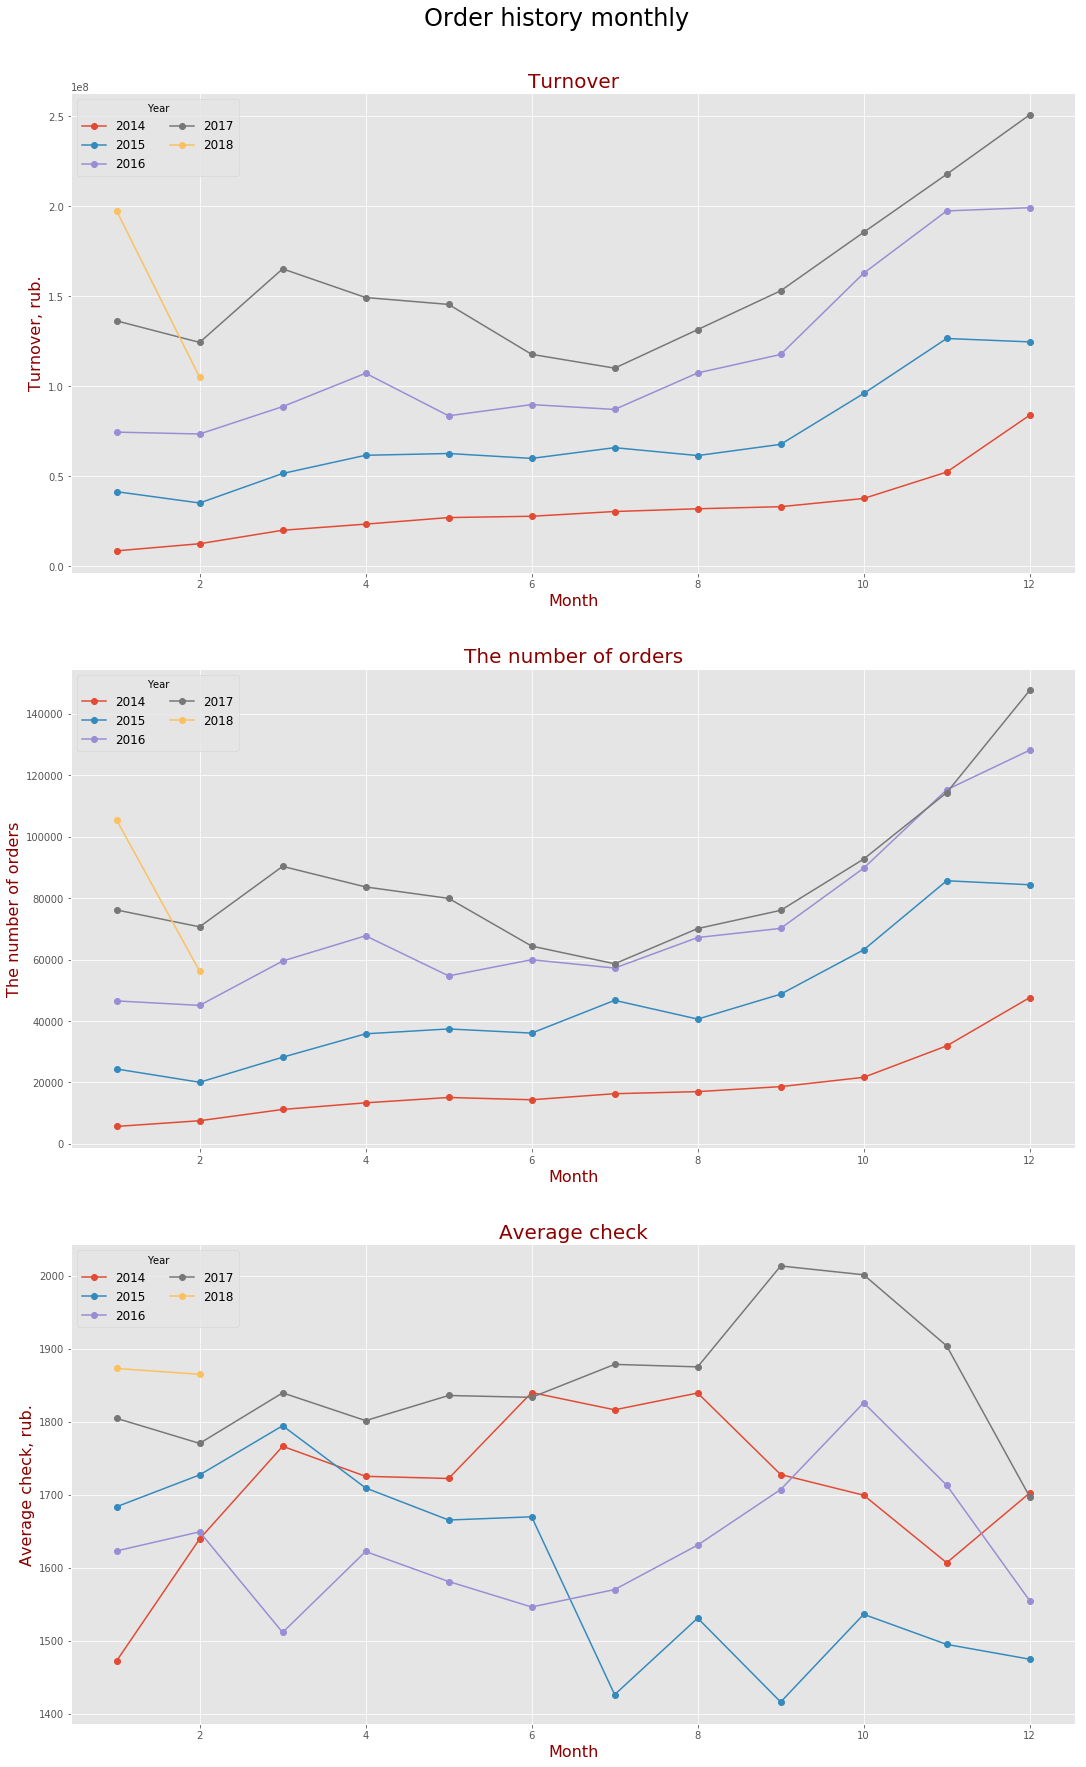

In [16]:
titles = {
    'sum': 'Turnover',
    'len': 'The number of orders',
    'mean': 'Average check'
}

labels = {
    'sum': 'Turnover, rub.',
    'len': 'The number of orders',
    'mean': 'Average check, rub.'
}

years = [_ for _ in range(2014, 2019)]

fig, axes = plt.subplots(3, figsize=(18, 30))
fig.suptitle('Order history monthly', fontsize=24, y=0.92)

custom_plot(axes, 'sum', years, ylabel=labels['sum'], title=titles['sum'])
custom_plot(axes, 'len', years, ylabel=labels['len'], title=titles['len'])
custom_plot(axes, 'mean', years, ylabel=labels['mean'], title=titles['mean'])

plt.show()

# Commodity circulation prediction

https://axd.semestr.ru/index/season.php    
http://www.ekonomika-st.ru/drugie/metodi/metodi-prognoz-1-2.html

#### Seasonal Prediction Technique:
1. To present graphically the actual values of the phenomenon being studied, in order to find out whether there is a seasonal wave, to identify the nature of the trend;
2. Calculate seasonality indicators (12-month amounts, 12-month average, centered averages, seasonality indicators, seasonality indices);
3. Determine the seasonality index:
   1. The method of constant average:
      1. The method of absolute differences,
      2. The method of relative differences,
      3. Index method (the calculation of the seasonal index using this formula does not take into account the presence of a trend);
   2. Moving average method,
   3. The method of analytical alignment;
4. Calculate the parameters of the equation describing the trend of the phenomenon under study;
5. Build a forecast:
   1. Formalized methods:
      1. Extrapolation methods:
         1. Moving average method,
         2. Exponential smoothing method,
         3. Least squares method;
      2. Modeling methods:
         1. Information modeling methods (patent and publication),
         2. Statistical modeling method,
         3. Logical modeling method (predictive analogy, “goal tree”);
   2. Intuitive methods;
6. Calculate its error:
   1. The average absolute score,
   2. Average square estimate,
   3. Average relative error.

In [17]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html#pandas.DataFrame.values
# extracting monthly turnover/factual values of the dynamic series
# from pivot table
total_monthly_turnover = pivot_table[('sum', False)] \
    + pivot_table[('sum', True)]

# change total_monthly_turnover from pandas dataframe to numpy array
total_monthly_turnover = total_monthly_turnover.values

# how many months do we drop when calculating the AA forecast
AA_bias = 8

# extracting monthly turnover/factual values of the dynamic series
# (column 3) without second half of 2017 from pivot table
monthly_turnover = pivot_table[('sum', False)][:-AA_bias] \
    + pivot_table[('sum', True)][:-AA_bias]

# change monthly_turnover from pandas dataframe to numpy array
monthly_turnover = monthly_turnover.values

print((type(total_monthly_turnover)))
print((total_monthly_turnover.shape))
print(total_monthly_turnover)

print((type(monthly_turnover)))
print((monthly_turnover.shape))
print(monthly_turnover)

<class 'numpy.ndarray'>
(50,)
[8.45597800e+06 1.24114960e+07 1.98950440e+07 2.33081640e+07
 2.69606960e+07 2.76845760e+07 3.03219880e+07 3.18479560e+07
 3.30052280e+07 3.75737840e+07 5.22606680e+07 8.38808880e+07
 4.13494960e+07 3.50622080e+07 5.14651160e+07 6.15878080e+07
 6.25710880e+07 5.98519360e+07 6.58223840e+07 6.14256840e+07
 6.76707840e+07 9.59428160e+07 1.26516408e+08 1.24638480e+08
 7.44633920e+07 7.34271520e+07 8.86384000e+07 1.07194464e+08
 8.35464240e+07 8.97664960e+07 8.70819680e+07 1.07370592e+08
 1.17647232e+08 1.62815776e+08 1.97452448e+08 1.99239072e+08
 1.36324256e+08 1.24342560e+08 1.65246560e+08 1.49302464e+08
 1.45466624e+08 1.17712136e+08 1.10035664e+08 1.31463624e+08
 1.53053376e+08 1.85562432e+08 2.17832704e+08 2.50887456e+08
 1.97521120e+08 1.04953024e+08]
<class 'numpy.ndarray'>
(42,)
[8.45597800e+06 1.24114960e+07 1.98950440e+07 2.33081640e+07
 2.69606960e+07 2.76845760e+07 3.03219880e+07 3.18479560e+07
 3.30052280e+07 3.75737840e+07 5.22606680e+07 8.388088

### 2. and 3. Calculate seasonality indicators and determine the seasonality index

https://4analytics.ru/sezonnost/kak-rasschitat-indeksi-sezonnosti-i-piki-v-excel.html

#### 3.A.c. The method of constant average (Index method)

In [18]:
# calculate average turnover by month
average_turnover_by_month = []

for month_id in range(12):
    tmp_amount = 0

    for idx in range(month_id, len(monthly_turnover), 12):
        tmp_amount += monthly_turnover[idx]

    number_of_years = (len(monthly_turnover) - month_id) // 12
    average_turnover_by_month.append(tmp_amount / number_of_years)

print(len(average_turnover_by_month), '=', 12, ', yes? OK')
average_turnover_by_month

12 = 12 , yes? OK


[86864374.0,
 81747805.33333333,
 108415040.0,
 113797633.33333333,
 106181610.66666667,
 98338381.33333333,
 61075446.666666664,
 100322116.0,
 109161622.0,
 148166188.0,
 188114762.0,
 203879220.0]

In [19]:
# calculate seasonality indices without trend
seasonality_indices_without_trend = []

average_turnover_for_all_time = monthly_turnover.sum() \
    / len(monthly_turnover)

seasonality_indices_without_trend = average_turnover_by_month \
    / (average_turnover_for_all_time / 100)

print(len(seasonality_indices_without_trend), '=', 12, ', yes? OK')
seasonality_indices_without_trend

12 = 12 , yes? OK


array([105.1824299 ,  98.98687353, 131.27772433, 137.79540494,
       128.57330694, 119.07608867,  73.95510486, 121.47815551,
       132.18174638, 179.41163868, 227.78461244, 246.87349689])

http://www.ekonomika-st.ru/drugie/metodi/metodi-prognoz-1-6.html

#### 3.B. Moving average method

In [20]:
# calculate 12-month amounts (column 4), 12-month average (column 5)
_12_month_amounts = []
_12_month_average = []

# first iteration of the algorithm
_12_month_amounts.append(monthly_turnover[:12].sum())
_12_month_average.append(_12_month_amounts[0] / 12)

for idx in range(12, len(monthly_turnover)):
    tmp_amount = _12_month_amounts[idx - 12] \
        - monthly_turnover[idx - 12] \
        + monthly_turnover[idx]

    _12_month_amounts.append(tmp_amount)
    _12_month_average.append(_12_month_amounts[idx - 12] / 12)

print(len(_12_month_amounts), '=', len(monthly_turnover) - 11, ', yes? OK')
print(len(_12_month_average), '=', len(_12_month_amounts), ', yes? OK')
print(_12_month_amounts)
_12_month_average

31 = 31 , yes? OK
31 = 31 , yes? OK
[387606460.0, 420500000.0, 443150720.0, 474720800.0, 513000450.0, 548610800.0, 580778200.0, 616278600.0, 645856300.0, 680521860.0, 738890900.0, 813146600.0, 853904200.0, 887018100.0, 925383040.0, 962556350.0, 1008163100.0, 1029138400.0, 1059053060.0, 1080312600.0, 1126257500.0, 1176234000.0, 1243107000.0, 1314043000.0, 1388643600.0, 1450504400.0, 1501419800.0, 1578027900.0, 1620136000.0, 1682056200.0, 1710001800.0]


[32300538.666666668,
 32300538.666666668,
 35041666.666666664,
 36929226.666666664,
 39560066.666666664,
 42750037.333333336,
 45717568.0,
 48398181.333333336,
 51356549.333333336,
 53821360.0,
 56710154.666666664,
 61574240.0,
 67762218.66666667,
 71158682.66666667,
 73918176.0,
 77115253.33333333,
 80213029.33333333,
 84013589.33333333,
 85761536.0,
 88254421.33333333,
 90026048.0,
 93854794.66666667,
 98019498.66666667,
 103592245.33333333,
 109503584.0,
 115720298.66666667,
 120875370.66666667,
 125118314.66666667,
 131502325.33333333,
 135011328.0,
 140171349.33333334]

In [21]:
# calculate centered averages (column 6)
centered_average = []

for idx in range(len(_12_month_average) - 1):
    centered_average.append(
        (_12_month_average[idx] + _12_month_average[idx + 1]) / 2)

print(len(centered_average), '=', len(_12_month_average) - 1, ', yes? OK')
centered_average

30 = 30 , yes? OK


[32300538.666666668,
 33671102.666666664,
 35985446.666666664,
 38244646.666666664,
 41155052.0,
 44233802.66666667,
 47057874.66666667,
 49877365.333333336,
 52588954.66666667,
 55265757.33333333,
 59142197.33333333,
 64668229.333333336,
 69460450.66666667,
 72538429.33333334,
 75516714.66666666,
 78664141.33333333,
 82113309.33333333,
 84887562.66666666,
 87007978.66666666,
 89140234.66666666,
 91940421.33333334,
 95937146.66666667,
 100805872.0,
 106547914.66666666,
 112611941.33333334,
 118297834.66666667,
 122996842.66666667,
 128310320.0,
 133256826.66666666,
 137591338.6666667]

In [22]:
# calculate seasonality indicators (column 7)
seasonality_indicators = []

for idx in range(len(centered_average)):
    seasonality_indicators.append(
        100 * monthly_turnover[idx + 6] / centered_average[idx])

print(len(seasonality_indicators), '=', len(centered_average), ', yes? OK')
seasonality_indicators

30 = 30 , yes? OK


[93.87455829426003,
 94.58542630838306,
 91.7182668475052,
 98.24586517293837,
 126.98481829156722,
 189.6307415215971,
 87.8694507410251,
 70.29683257260527,
 97.86297584009782,
 111.43936312776003,
 105.79770590419727,
 92.55230368453776,
 94.76239121435395,
 84.68019581418378,
 89.61033898084833,
 121.96512206679992,
 154.07539779746952,
 146.82772844995654,
 85.58225709997723,
 82.37262586819008,
 96.40852055554352,
 111.73405476863601,
 82.8785291396517,
 84.24988539741295,
 77.32924854055737,
 90.76293940843729,
 95.6506113891357,
 126.89219074506244,
 148.17435844687682,
 144.80495206364927]

In [23]:
# calculate seasonality indices
seasonality_indices = []

for month_id in range(12):
    tmp_amount = 0

    for idx in range(month_id, len(centered_average), 12):
        tmp_amount += seasonality_indicators[idx]

    number_of_years = (len(centered_average) - month_id) // 12
    seasonality_indices.append(tmp_amount / number_of_years)


seasonality_indices[6:], seasonality_indices[:6] = \
    seasonality_indices[:6], seasonality_indices[6:]

print(len(seasonality_indices), '=', 12, ', yes? OK')
seasonality_indices

12 = 12 , yes? OK


[86.72585392050117,
 152.66945844079535,
 194.27149639564135,
 223.17341789639605,
 188.67623504384898,
 176.8021890819507,
 132.98309902458567,
 135.01428076550206,
 138.48960860874462,
 173.55158899240035,
 214.61728726795678,
 240.63171101760145]

#### Method comparison (matplotlib)

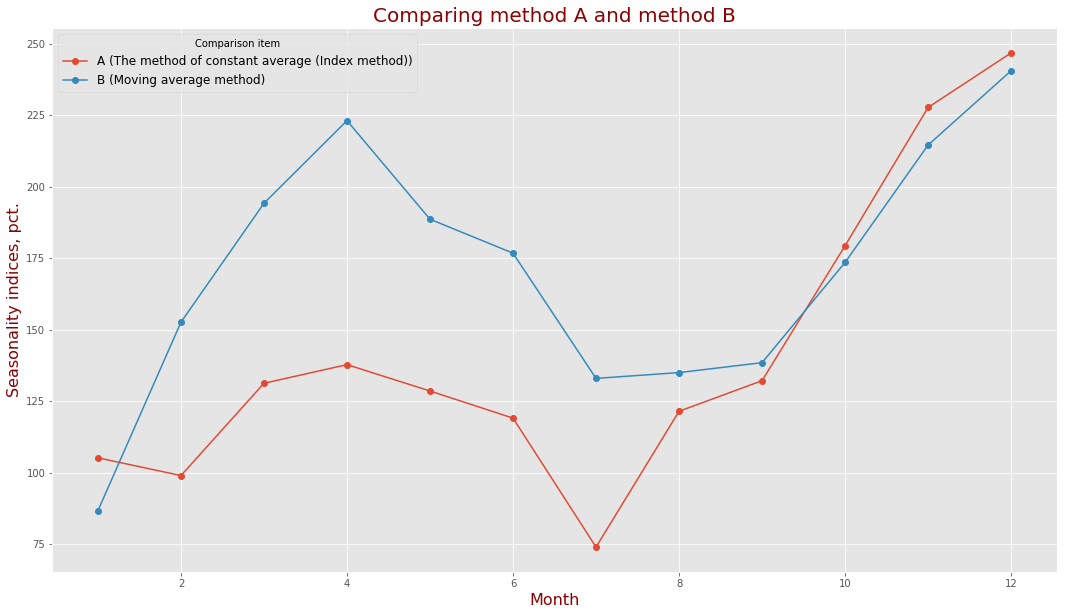

In [24]:
# comparing method A (The method of constant average (Index method))
# and method B (Moving average method)
comparison_table = {
    'A (The method of constant average (Index method))':
    seasonality_indices_without_trend,
    'B (Moving average method)':
    seasonality_indices
}

methods = [
    'A (The method of constant average (Index method))',
    'B (Moving average method)'
]

fig, axes = plt.subplots(figsize=(18, 10))

custom_plot(
    axes,
    'comparison',
    methods,
    comparison_table,
    ylabel='Seasonality indices, pct.',
    xdata=[_ for _ in range(1, 13)],
    title='Comparing method A and method B')

plt.show()

#### Conclusion    
In the period from February to October there is a positive trend. In the period from September to November, there is almost no trend. In the period from October to February, there is a negative trend. The trend peak is observed in April.

### 4. Calculate the parameters of the equation describing the trend of the phenomenon under study (for 5.A.a.iii.)

In [25]:
# http://www.ekonomika-st.ru/drugie/metodi/metodi-prognoz-1-6.html
# calculate 'a'
n = len(monthly_turnover)
X = np.array([_ for _ in range(1, n + 1)])
X_2 = np.array([_**2 for _ in range(1, n + 1)])
Yf_X = X * monthly_turnover

print(len(X), '=', n, ', yes? OK')
print(X)
print(len(X_2), '=', n, ', yes? OK')
print(X_2)
print(len(Yf_X), '=', n, ', yes? OK')
print(Yf_X)

X_sum = X.sum()
monthly_turnover_sum = monthly_turnover.sum()
a = (Yf_X.sum() - X_sum * monthly_turnover_sum / n) \
    / (X_2.sum() - X_sum**2 / n)

print('a =', a)

42 = 42 , yes? OK
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
42 = 42 , yes? OK
[   1    4    9   16   25   36   49   64   81  100  121  144  169  196
  225  256  289  324  361  400  441  484  529  576  625  676  729  784
  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681 1764]
42 = 42 , yes? OK
[8.45597800e+06 2.48229920e+07 5.96851320e+07 9.32326560e+07
 1.34803480e+08 1.66107456e+08 2.12253916e+08 2.54783648e+08
 2.97047052e+08 3.75737840e+08 5.74867348e+08 1.00657066e+09
 5.37543448e+08 4.90870912e+08 7.71976740e+08 9.85404928e+08
 1.06370850e+09 1.07733485e+09 1.25062530e+09 1.22851368e+09
 1.42108646e+09 2.11074195e+09 2.90987738e+09 2.99132352e+09
 1.86158480e+09 1.90910595e+09 2.39323680e+09 3.00144499e+09
 2.42284630e+09 2.69299488e+09 2.69954101e+09 3.43585894e+09
 3.88235866e+09 5.53573638e+09 6.91083568e+09 7.17260659e+09
 5.04399747e+09 4.72501728e+09 6.44461584e+09 5.972098

In [26]:
# http://www.ekonomika-st.ru/drugie/metodi/metodi-prognoz-1-6.html
# calculate 'b'
b = (monthly_turnover_sum - a * X_sum) / n

print('b =', b)

b = 4237793.168408836


### 5.A.a.iii. Build a forecast by least squares method

In [27]:
# http://www.ekonomika-st.ru/drugie/metodi/metodi-prognoz-1-6.html
# building a forecast for the second half of 2017
forecast_A = []
forecast_B = []

for month in range(6, 12):
    forecast_A.append((a * (n - 14 + month) + b) *
                      seasonality_indices_without_trend[month] / 100)
    forecast_B.append(
        (a * (n - 14 + month) + b) * seasonality_indices[month] / 100)

print(len(forecast_A), '=', 6, ', yes? OK')
print(forecast_A)
print(len(forecast_B), '=', 6, ', yes? OK')
forecast_B

6 = 6 , yes? OK
[94762296.83261052, 160082611.8526852, 179004434.94144273, 249502371.9259139, 325073757.3820225, 361311850.54632807]
6 = 6 , yes? OK


[170397755.88394773,
 177920372.69120908,
 187546728.75563416,
 241352977.00793555,
 306282532.5390955,
 352176681.18345225]

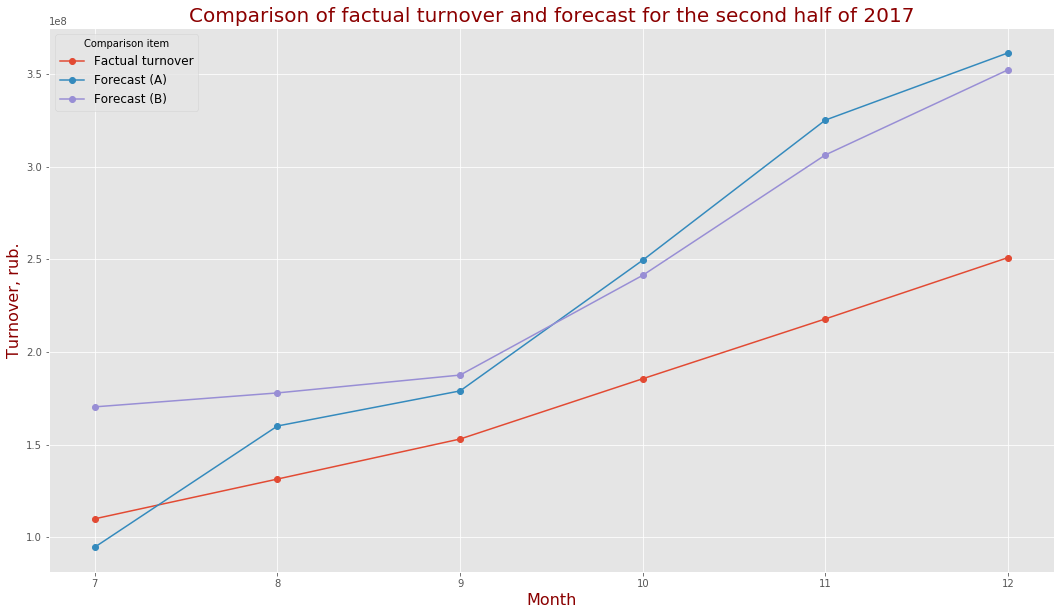

In [28]:
# comparison of actual turnover and forecast for the second half of 2017
comparison_table = {
    'Factual turnover': total_monthly_turnover[42:48],
    'Forecast (A)': forecast_A,
    'Forecast (B)': forecast_B
}

fact_and_forecast = ['Factual turnover', 'Forecast (A)', 'Forecast (B)']

fig, axes = plt.subplots(figsize=(18, 10))

custom_plot(
    axes,
    'comparison',
    fact_and_forecast,
    comparison_table,
    ylabel='Turnover, rub.',
    xdata=[_ for _ in range(7, 13)],
    title='Comparison of factual turnover and forecast for the second half of 2017')

plt.show()

### 6.C. Calculate average relative error

In [29]:
# http://www.ekonomika-st.ru/drugie/metodi/metodi-prognoz-1-6.html
# calculate error of forecast (column 12)
Y_p_A = []
Y_p_B = []

for month in range(6, 12):
    Y_p_A.append((a * (n - 14 + month) + b) *
                 seasonality_indices_without_trend[month] / 100)
    Y_p_B.append((a * (n - 14 + month) + b) * seasonality_indices[month] / 100)

Y_p_A = np.array(Y_p_A)
Y_p_B = np.array(Y_p_B)

print(len(Y_p_A), '=', 6, ', yes? OK')
print(Y_p_A)
print(len(Y_p_B), '=', 6, ', yes? OK')
print(Y_p_B)

upsilon_A = 100 * abs(total_monthly_turnover[42:48] -
                      Y_p_A) / total_monthly_turnover[42:48]
upsilon_B = 100 * abs(total_monthly_turnover[42:48] -
                      Y_p_B) / total_monthly_turnover[42:48]

print(len(upsilon_A), '=', 6, ', yes? OK')
print(upsilon_A)
print(len(upsilon_B), '=', 6, ', yes? OK')
print(upsilon_B)

average_upsilon_A = round(upsilon_A.sum() / 6, 2)
average_upsilon_B = round(upsilon_B.sum() / 6, 2)

print('Average relative error (A) =', average_upsilon_A)
print('Average relative error (B) =', average_upsilon_B)

6 = 6 , yes? OK
[9.47622968e+07 1.60082612e+08 1.79004435e+08 2.49502372e+08
 3.25073757e+08 3.61311851e+08]
6 = 6 , yes? OK
[1.70397756e+08 1.77920373e+08 1.87546729e+08 2.41352977e+08
 3.06282533e+08 3.52176681e+08]
6 = 6 , yes? OK
[13.88037897 21.76951082 16.95556127 34.45737331 49.2309242  44.01351758]
6 = 6 , yes? OK
[54.8568434  35.33810135 22.53681275 30.06564659 40.60447624 40.37237525]
Average relative error (A) = 30.05
Average relative error (B) = 37.3


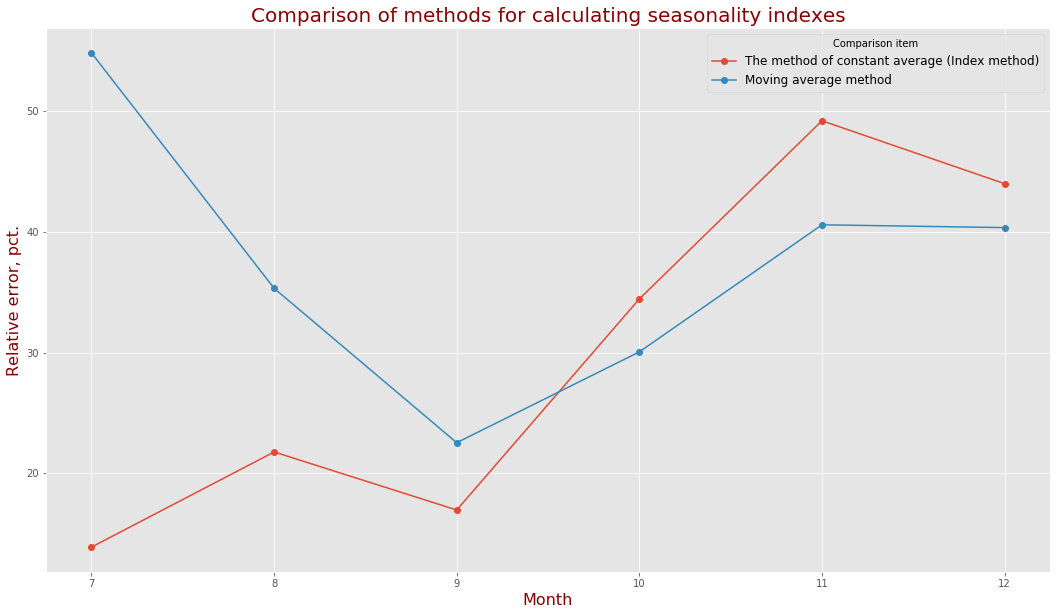

In [30]:
# comparison of average relative error calculated by 3.A.c
# and average relative error calculated by 3.B
# for forecast for the second half of 2017
comparison_table = {
    'The method of constant average (Index method)': upsilon_A,
    'Moving average method': upsilon_B
}

methods = [
    'The method of constant average (Index method)', 'Moving average method'
]

fig, axes = plt.subplots(figsize=(18, 10))

custom_plot(
    axes,
    'comparison',
    methods,
    comparison_table,
    ylabel='Relative error, pct.',
    xdata=[_ for _ in range(7, 13)],
    title='Comparison of methods for calculating seasonality indexes')

plt.show()

In [31]:
%%html
<style >
table {margin-left: 0 !important
       }
</style >

http://www.ekonomika-st.ru/drugie/metodi/metodi-prognoz-1-2.html

#### Conclusion    
The accuracy of the forecast (The method of constant average (Index method)) is {{average_upsilon_A}}%. The accuracy of the forecast (Moving average method) is {{average_upsilon_B}}%. The accuracy of the forecast is satisfactory, since it is in the range of 20-50%.

Table 1 - Interpretation of the average relative error values    

|Average relative error (ε), %|Interpretation|
|--------------------------|--------------|
| <10  | Forecast accuracy is high  |
|10-20 | Accuracy is good  |
|20-50 | Accuracy satisfactory  |
| >50  | Accuracy unsatisfactory  |